## Part 1: Import Libraries and Load Data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./coffee_shop_revenue.csv')
print("Part 1: Data Loaded")

Part 1: Data Loaded


In [51]:
print(data.head())  
print("\nData Shape:", data.shape)  

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

## Part 2: Descriptive Statistics and Missing Values

In [52]:
print("\nPart 2: Descriptive Statistics")
print(data.describe())


Part 2: Descriptive Statistics
       Number_of_Customers_Per_Day  Average_Order_Value  \
count                  2000.000000          2000.000000   
mean                    274.296000             6.261215   
std                     129.441933             2.175832   
min                      50.000000             2.500000   
25%                     164.000000             4.410000   
50%                     275.000000             6.300000   
75%                     386.000000             8.120000   
max                     499.000000            10.000000   

       Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
count              2000.000000          2000.000000              2000.000000   
mean                 11.667000             7.947000               252.614160   
std                   3.438608             3.742218               141.136004   
min                   6.000000             2.000000                10.120000   
25%                   9.000000      

In [53]:
print("\nMissing Values Check")
print(data.isnull().sum())


Missing Values Check
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


## Part 3: Outlier Detection and Handling

In [54]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = data[(z_scores > 3).any(axis=1)]
print("\nPart 3: Outliers Detected (Z-score > 3)")
print(outliers)

data_cleaned = data[(data['Daily_Revenue'] >= 0) & (z_scores < 3).all(axis=1)].copy()
print("\nData Shape after Outlier Removal:", data_cleaned.shape)


Part 3: Outliers Detected (Z-score > 3)
      Number_of_Customers_Per_Day  Average_Order_Value  \
1593                          453                 9.93   
1719                          495                 9.63   

      Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
1593                       12                    7                   474.97   
1719                       12                    3                   356.89   

      Location_Foot_Traffic  Daily_Revenue  
1593                    563         5114.6  
1719                    139         4881.0  

Data Shape after Outlier Removal: (1997, 7)


## Part 4: Visualize Distribution of Variables

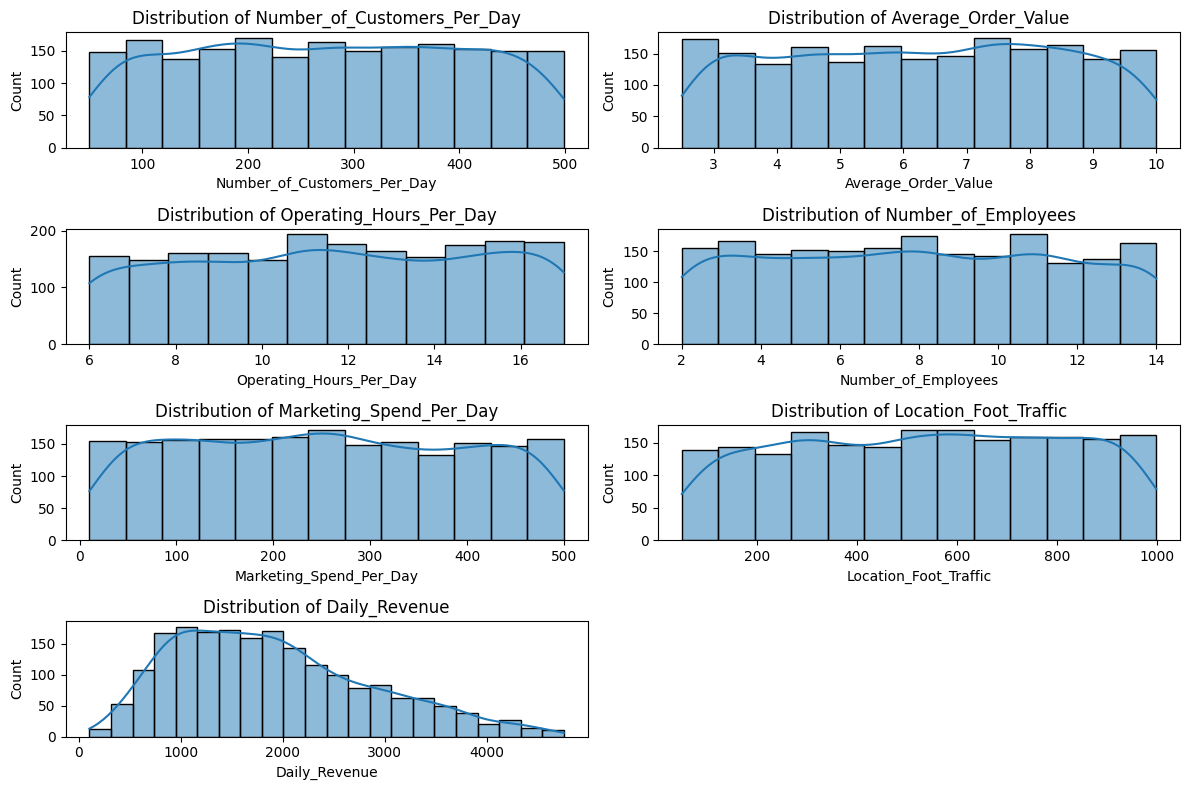

In [55]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data_cleaned.columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## Part 5: Correlation Analysis


Part 5: Correlation Matrix


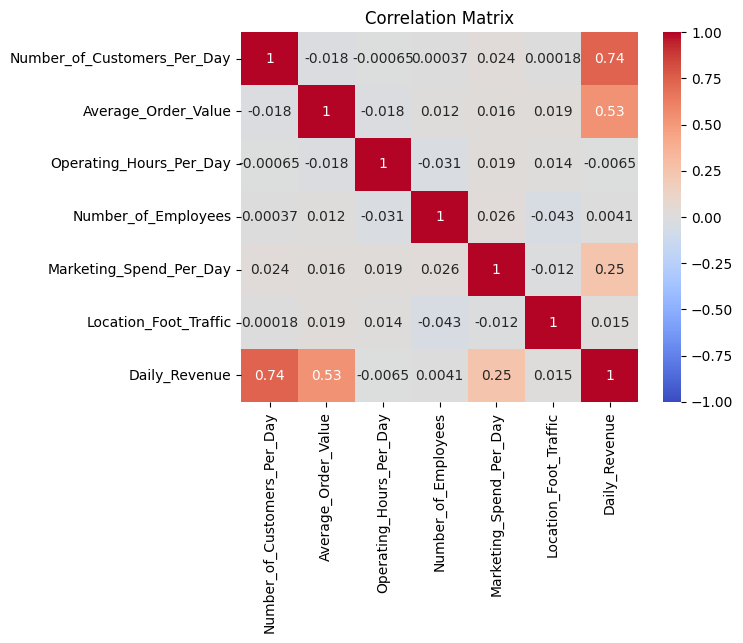

In [56]:
print("\nPart 5: Correlation Matrix")
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Part 6: Feature Selection and Data Preparation

In [57]:
selected_features = ['Number_of_Customers_Per_Day', 'Average_Order_Value', 
                    'Marketing_Spend_Per_Day', 'Location_Foot_Traffic']
X = data_cleaned[selected_features]
y = data_cleaned['Daily_Revenue']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nPart 6: Data Split")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Part 6: Data Split
Training set shape: (1597, 4)
Testing set shape: (400, 4)


## Part 7: Apply Regression Algorithms

In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae, 
                     'CV Mean': cv_mean, 'CV Std': cv_std}
    
    print(f"\n{name} Results:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Cross-Validation Mean: {cv_mean:.4f} (+/- {cv_std*2:.4f})")


Linear Regression Results:
R-squared: 0.8974
Mean Squared Error: 92807.29
Mean Absolute Error: 238.93
Cross-Validation Mean: 0.8899 (+/- 0.0052)

Ridge Regression Results:
R-squared: 0.8974
Mean Squared Error: 92797.63
Mean Absolute Error: 238.89
Cross-Validation Mean: 0.8899 (+/- 0.0052)

Lasso Regression Results:
R-squared: 0.8974
Mean Squared Error: 92860.16
Mean Absolute Error: 238.97
Cross-Validation Mean: 0.8899 (+/- 0.0050)

Decision Tree Results:
R-squared: 0.9017
Mean Squared Error: 88931.63
Mean Absolute Error: 243.08
Cross-Validation Mean: 0.8986 (+/- 0.0161)

Random Forest Results:
R-squared: 0.9480
Mean Squared Error: 47033.07
Mean Absolute Error: 175.06
Cross-Validation Mean: 0.9462 (+/- 0.0073)

Gradient Boosting Results:
R-squared: 0.9508
Mean Squared Error: 44468.21
Mean Absolute Error: 168.89
Cross-Validation Mean: 0.9492 (+/- 0.0078)


## Part 8: Compare Models


Part 8: Model Comparison
                   R2 Score           MSE         MAE   CV Mean    CV Std
Linear Regression  0.897413  92807.287159  238.925137  0.889880  0.002599
Ridge Regression   0.897424  92797.632847  238.893880  0.889882  0.002581
Lasso Regression   0.897354  92860.157937  238.971975  0.889880  0.002522
Decision Tree      0.901697  88931.626872  243.076625  0.898620  0.008043
Random Forest      0.948011  47033.074272  175.057791  0.946224  0.003657
Gradient Boosting  0.950846  44468.206468  168.889139  0.949169  0.003910


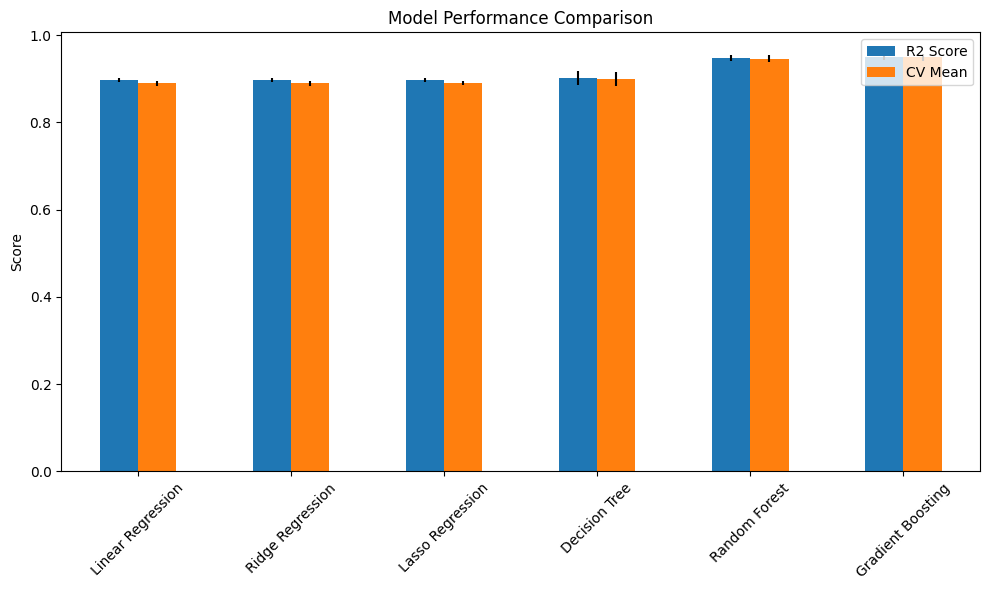

In [59]:
print("\nPart 8: Model Comparison")
results_df = pd.DataFrame(results).T
print(results_df)

results_df[['R2 Score', 'CV Mean']].plot(kind='bar', yerr=results_df['CV Std']*2, figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(['R2 Score', 'CV Mean'])
plt.tight_layout()
plt.show()